## <strong>PROJETO FINAL VISÃO COMPUTACIONAL</strong>
**EXOPLANETAS**

Nicole Sarvasi Alves da Costa

Marcelo Miguel

Nosso projeto foi baseado no uso do Lightkurve, um pacote com o objetivo de apoiar a ciência em conjunto com os dados provindos dos telescópios espaciais TESS e o Kepler da NASA. Em suma, o objetivo deles é criar um ambiente fácil, acessível e *open source* para a análise de dados de séries temporais sobre o brilho de planetas, estrelas e galáxias.

Nesta aplicação em específico, implementamos um algoritmo de processamento com a função de filtro passa-baixa, depois fazemos a detecção do contorno para o cálculo da área da estrela e por fim plotamos um gráfico 3D da imagem pela sua intensidade.




#### **PASSO 1:** instalar o lightkurve e importar o search_targetpixelfile

In [ ]:
#! python -m pip install lightkurve --upgrade

In [ ]:
from lightkurve import search_targetpixelfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian1DKernel
from astropy import units as u
import imageio
import os

#### **PASSO 2:** baixar a imagem e plotar seu heatmap

In [ ]:
pixelfile = search_targetpixelfile("KIC 6922244", quarter=16).download();
pixelfile1 = search_targetpixelfile("KIC 8462852", quarter=16).download();

In [ ]:
# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# z,x,y=pixelfile1.flux.nonzero()
# ax.scatter(x, y, z, c=z, alpha=1)


In [ ]:
len(pixelfile1.flux)

3540

In [ ]:
kic_matrix = pixelfile1.flux[0]

In [ ]:
def plot_heatmap(matrix):    
    #plt.imshow((matrix), interpolation='nearest')
    sns.heatmap(matrix)
    plt.gca().invert_yaxis()
    #plt.show()


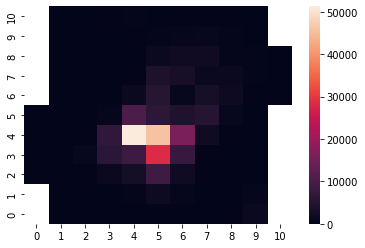

In [ ]:

plot_heatmap(kic_matrix)

#### **PASSO 3:** Aplicar um filtro passa-baixa no heatmap

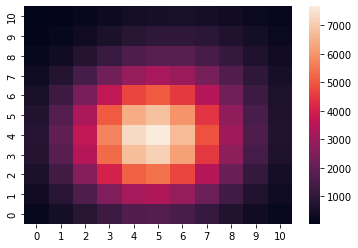

In [ ]:
from astropy.convolution.kernels import Gaussian2DKernel
blur = convolve(kic_matrix, Gaussian2DKernel(2))
plot_heatmap(blur)


#### **PASSO 4:** Transferir o eixo de intensidade para uma escala de 1 a 256

7659.16845703125 electron / s


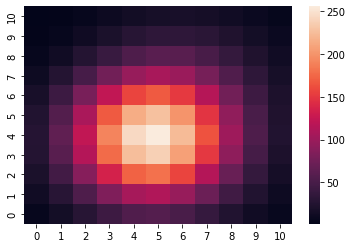

In [ ]:
max_value =max(map(max, blur))
print(max_value)
blur_normalize = blur*256/max_value
plot_heatmap(blur_normalize)

#### **PASSO 5:** Detectar contorno para o cálculo da área

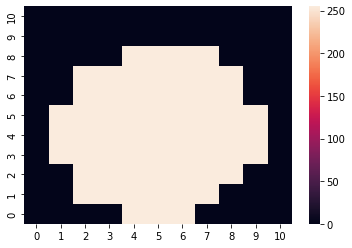

In [ ]:
rows,cols=blur_normalize.shape
T=np.median(blur_normalize)
blur_bin = blur_normalize.copy()
for l in range(rows):
    for c in range(cols):
        if blur_normalize[l,c] < T:
            blur_bin[l,c]=0
        else:
            blur_bin[l,c]=255
plot_heatmap(blur_bin)

In [ ]:
blur_normalize

<Quantity [[  6.282278 ,  14.453397 ,  27.258247 ,  42.31914  ,
             54.252193 ,  57.441753 ,  50.421906 ,  37.185604 ,
             23.588171 ,  13.247927 ,   6.745187 ],
           [ 12.382366 ,  28.636972 ,  54.004395 ,  83.55827  ,
            106.55502  , 112.1115   ,  97.68583  ,  71.241585 ,
             44.138775 ,  23.54131  ,  10.938563 ],
           [ 19.686508 ,  45.87488  ,  86.934105 , 134.75789  ,
            171.69682  , 180.21666  , 156.59639  , 113.81488  ,
             69.92681  ,  36.401554 ,  16.014162 ],
           [ 25.489935 ,  59.852077 , 114.04451  , 177.32576  ,
            226.15338  , 237.38615  , 206.35957  , 150.1823   ,
             92.35827  ,  47.89401  ,  20.72419  ],
           [ 27.192041 ,  64.21556  , 122.61552  , 190.75606  ,
            243.44008  , 256.       , 223.35545  , 163.50687  ,
            101.40725  ,  53.206524 ,  23.365568 ],
           [ 24.016285 ,  56.906914 , 108.43448  , 168.29941  ,
            214.95213  , 227.16608  

#### **PASSO 6:** Plotar um gráfico 3D da imagem pela intensidade

In [ ]:
x, y = blur_normalize.nonzero()
rows,cols=blur_normalize.shape
z = []
for l in range(rows):
    for c in range(cols):
        z.append(blur_normalize[l,c])

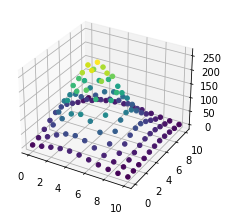

In [ ]:
plt.rcParams["figure.figsize"] = [3.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, alpha=1)

In [ ]:
one_electron = 1*u.electron/u.s
# from astropy.visualization import quantity_support
# quantity_support()  
filenames = []
for i in range(0,len(pixelfile1.flux),50):
    filename = f'{i}.png'
    filenames.append(filename)
    matrix_i = pixelfile1.flux[i]
    matrix_i = convolve(matrix_i, Gaussian2DKernel(2))
    x, y = matrix_i.nonzero()
    rows,cols=matrix_i.shape
    z = []
    for l in range(rows):
        for c in range(cols):
            z.append(matrix_i[l,c]/one_electron)
    #print(z)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_zlim(0, 9000)
    ax.scatter(x, y, z, c=z, alpha=1)
    plt.savefig(filename)
    plt.close()
    
# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
for filename in set(filenames):
    os.remove(filename)


## **REFERÊNCIAS**



1.   https://docs.lightkurve.org/
2.   http://exoplanet.eu/catalog/



